<a href="https://colab.research.google.com/github/SuzanaKstro/Passo-a-passo/blob/main/14_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install numpy pmdarima pandas requests inflection seaborn scipy matplotlib IPython scikit-learn statsmodels pmdarima tqdm statsforecast

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [4]:
df = pd.read_csv('/content/Dados Históricos - Ibovespa (2).csv')

In [5]:
df.rename(columns={'Último': 'Fechamento'}, inplace=True)

In [8]:
df.head()

,Data,Fechamento,Abertura,Máxima,Mínima,Vol.,Var%
0,30.12.2024,120.283,120.267,121.050,120.158,"8,90M","0,01%"
1,27.12.2024,120.269,121.078,121.609,120.252,"8,94M","-0,67%"
2,26.12.2024,121.078,120.767,121.612,120.428,"8,34M","0,26%"
3,23.12.2024,120.767,122.105,122.105,120.617,"9,95M","-1,09%"
4,20.12.2024,122.102,121.183,122.209,120.700,"18,13M","0,75%"


In [9]:
df['Data'] = pd.to_datetime(df['Data'], format="%d.%m.%Y")

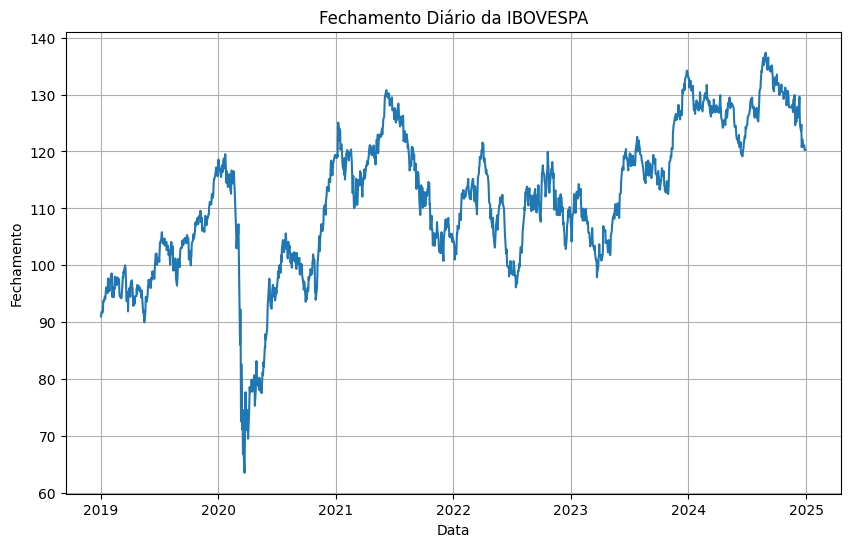

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df['Data'], df['Fechamento'])
plt.title('Fechamento Diário da IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.grid(True)
plt.show()

In [15]:
df['Vol.'] = df['Vol.'].astype(str)
df['Vol.'] = df['Vol.'].str.replace('M','').str.replace(',','.').str.replace('K','').astype(float)
df['Var%'] = df['Var%'].str.replace('%','').str.replace(',','.').astype(float)

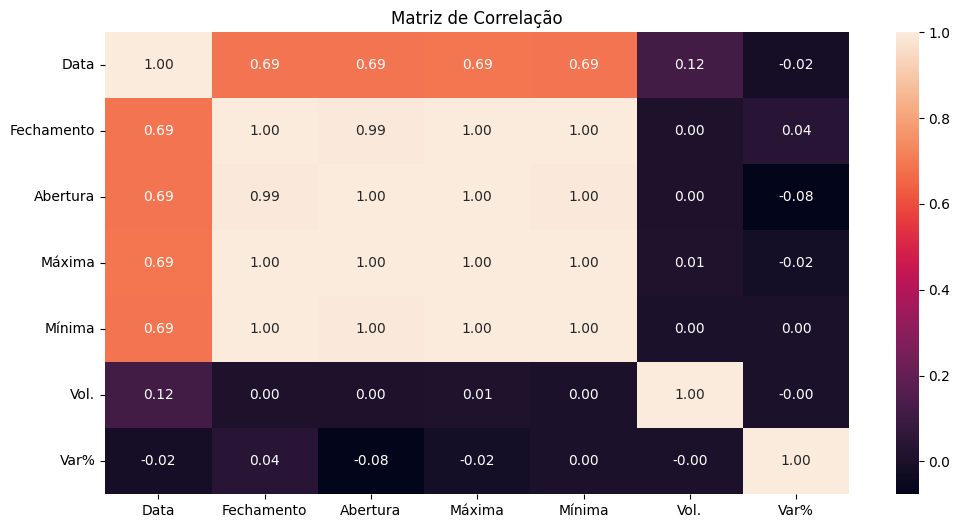

In [16]:
plt.figure(figsize=(12,6))
correlation = df.corr()
sns.heatmap( correlation, annot=True, fmt='.2f' )
plt.title('Matriz de Correlação')

plt.show()

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1000x600 with 0 Axes>

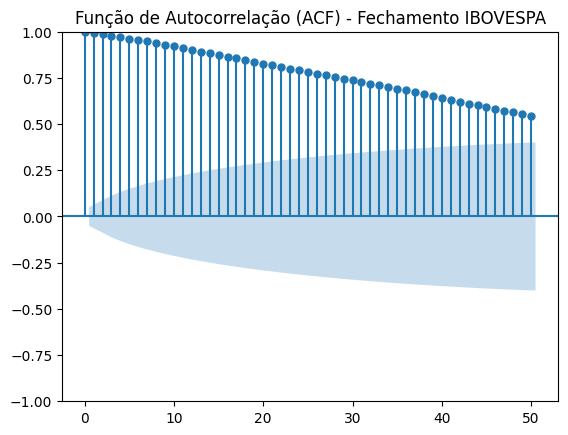

In [19]:
plt.figure(figsize=(10, 6))
plot_acf(df['Fechamento'], lags=50)
plt.title('Função de Autocorrelação (ACF) - Fechamento IBOVESPA')
plt.show()

In [22]:
result = adfuller(df['Fechamento'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.4030974937872
p-value: 0.14086407186459932


In [20]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

adf_test(df['Fechamento'])

ADF Statistic: -2.4030974937872
p-value: 0.14086407186459932
Critial Values:
   1%, -3.4347641828771405
Critial Values:
   5%, -2.863489576334964
Critial Values:
   10%, -2.5678079331921446


In [25]:
resultado = sm.tsa.adfuller(df['Fechamento'])

In [26]:
print("Estatística ADF:", resultado[0])
print("Valor p:", resultado[1])
print("Número de lags utilizados:", resultado[2])
print("Número de observações usadas para o teste:", resultado[3])
print("Valores críticos:")
for chave, valor in resultado[4].items():
        print(f'   {chave}: {valor}')
if resultado[1] < 0.05:
        print("Conclusão: A série é estacionária (rejeita-se a hipótese nula).")
else:
        print("Conclusão: A série não é estacionária (não se rejeita a hipótese nula).")

Estatística ADF: -2.4030974937872
Valor p: 0.14086407186459932
Número de lags utilizados: 8
Número de observações usadas para o teste: 1484
Valores críticos:
   1%: -3.4347641828771405
   5%: -2.863489576334964
   10%: -2.5678079331921446
Conclusão: A série não é estacionária (não se rejeita a hipótese nula).


In [40]:
result_diff = sm.tsa.adfuller(df['Fechamento_diff'].dropna())
print('ADF Statistic (Diferenciado):', result_diff[0])
print('p-value (Diferenciado):', result_diff[1])

ADF Statistic (Diferenciado): -11.914390692963682
p-value (Diferenciado): 5.205877550641877e-22


In [30]:
df['Fechamento_diff'] = df['Fechamento'].diff().dropna()
adf_test(df['Fechamento_diff'].dropna())


ADF Statistic: -11.914390692963682
p-value: 5.205877550641877e-22
Critial Values:
   1%, -3.4347641828771405
Critial Values:
   5%, -2.863489576334964
Critial Values:
   10%, -2.5678079331921446


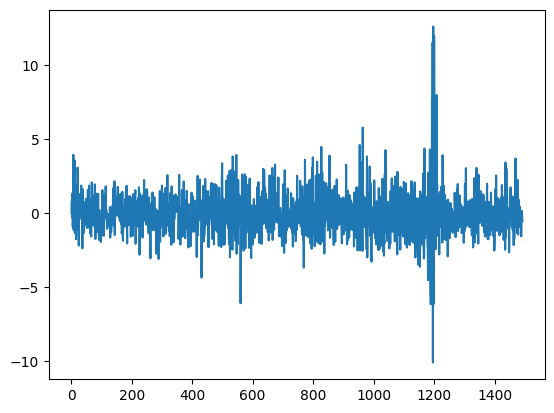

In [32]:
plt.plot(df.index, df.Fechamento_diff)

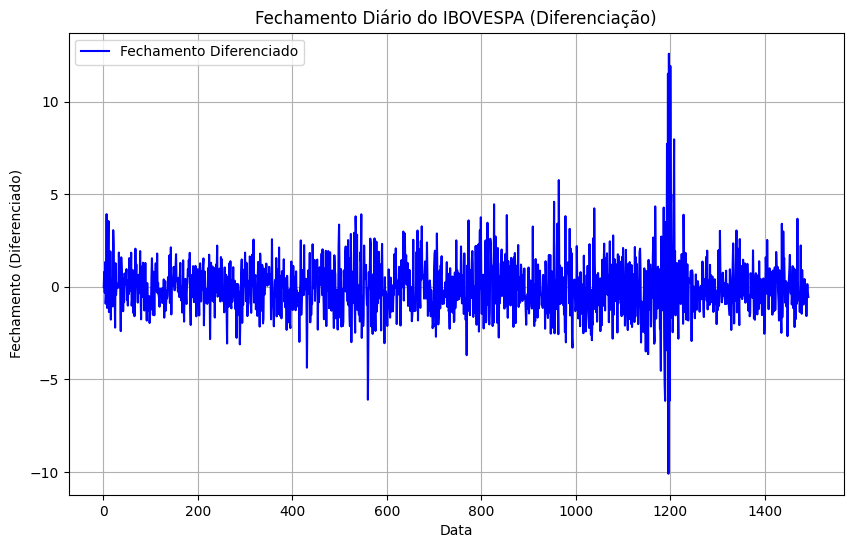

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Fechamento_diff'], label='Fechamento Diferenciado', color='blue')
plt.title('Fechamento Diário do IBOVESPA (Diferenciação)')
plt.xlabel('Data')
plt.ylabel('Fechamento (Diferenciado)')
plt.grid()
plt.legend()
plt.show()

In [41]:
from pmdarima import auto_arima

In [44]:
modelo_auto_arima = auto_arima(df['Fechamento'], seasonal=False, trace=True)
print(modelo_auto_arima.summary())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5495.594, Time=4.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5513.921, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5497.428, Time=0.11 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5499.087, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5512.165, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5497.344, Time=0.78 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5495.010, Time=1.73 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5498.098, Time=0.49 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5497.034, Time=0.27 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5494.211, Time=1.44 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5496.782, Time=0.33 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5496.180, Time=1.90 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5493.922, Time=2.45 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5495.760, Time=5.77 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5493.208, Time=3.85 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5494.980, Time=3.54 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=5495.907, Time=7.20 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=5493.496, Time=4.42 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=5497.031, Time=2.93 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=5492.004, Time=8.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=5493.414, Time=6.40 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=8.97 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=5495.432, Time=5.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=5495.275, Time=9.42 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=5488.844, Time=8.35 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,5)(0,0,0)[0]             : AIC=5486.979, Time=5.41 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(0,0,0)[0]             : AIC=inf, Time=4.69 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0]             : AIC=5489.338, Time=6.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0]             : AIC=5489.959, Time=2.71 sec

Best model:  ARIMA(5,1,5)(0,0,0)[0]          
Total fit time: 107.880 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1493
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -2732.490
Date:                Tue, 14 Jan 2025   AIC                           5486.979
Time:                        19:56:19   BIC                           5545.366
Sample:                             0   HQIC                          5508.736
                               - 1493                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4408      0.117     -3.756      0.000      -0.67

In [45]:
df['Previsões'] = modelo_auto_arima.predict_in_sample()

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [48]:
y_true = df['Fechamento']
y_pred = modelo_auto_arima.predict_in_sample()

In [50]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE:', mae)
mse = mean_squared_error(y_true, y_pred)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('MAPE:', mape)
r2 = r2_score(y_true, y_pred)
print('R²:', r2)

MAE: 1.1782945684379948
MSE: 11.970532204433134
RMSE: 3.459845690841303
MAPE: 1.0954109535797651
R²: 0.9272252758916605


In [51]:
erro_aceitavel = 0.05

acuracia = np.mean(np.abs((y_true - y_pred) / y_true) <= erro_aceitavel) * 100
print('Acurácia:', acuracia)

Acurácia: 98.86135298057603
